In [1]:
import torch
import pyro



In [190]:
import pyro

def model(x, y=None):
    theta_0 = pyro.param("theta_0", torch.randn(1))
    theta_1 = pyro.param("theta_1", torch.randn(1))
    with pyro.plate("data", len(x)):
        return pyro.sample(
            "obs", pyro.distributions.Normal(x * theta_1 + theta_0, 1.0), obs=y
        )

In [191]:
x = torch.linspace(-5.0, 5.0, 100)
y = x * 4 + 5 + torch.randn(100)

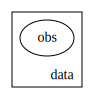

In [192]:
pyro.render_model(model, model_kwargs={"x":x})

In [193]:
trace = pyro.poutine.trace(model, ).get_trace(x, y)

In [194]:
trace.observation_nodes

['obs']

In [195]:
trace.stochastic_nodes

['data']

In [197]:
params = [trace.nodes[name]["value"].unconstrained() for name in trace.param_nodes]
params[0]

tensor(2., requires_grad=True)

In [201]:
for name in trace.param_nodes:
    print(trace.nodes[name])

{'type': 'param', 'name': 'theta_0', 'fn': <bound method ParamStoreDict.get_param of <pyro.params.param_store.ParamStoreDict object at 0x121bb8be0>>, 'is_observed': False, 'args': ('theta_0', tensor([-0.4177])), 'kwargs': {'constraint': Real(), 'event_dim': None}, 'value': tensor(2., requires_grad=True), 'scale': 1.0, 'mask': None, 'cond_indep_stack': (), 'done': True, 'stop': False, 'continuation': None, 'infer': {}}
{'type': 'param', 'name': 'theta_1', 'fn': <bound method ParamStoreDict.get_param of <pyro.params.param_store.ParamStoreDict object at 0x121bb8be0>>, 'is_observed': False, 'args': ('theta_1', tensor([-1.3797])), 'kwargs': {'constraint': Real(), 'event_dim': None}, 'value': tensor(2., requires_grad=True), 'scale': 1.0, 'mask': None, 'cond_indep_stack': (), 'done': True, 'stop': False, 'continuation': None, 'infer': {}}


In [39]:
logp = trace.log_prob_sum()

In [40]:
logp

tensor(-148.6072, grad_fn=<AddBackward0>)

In [41]:
pyro.param("theta_0")

tensor([-0.3683], requires_grad=True)

In [42]:
pyro.param("theta_1")

tensor([0.1496], requires_grad=True)

In [43]:
n = torch.distributions.Normal(x * pyro.param("theta_1").item() + pyro.param("theta_0").item(), 1.0)

In [44]:
n

Normal(loc: torch.Size([100]), scale: torch.Size([100]))

In [46]:
n.log_prob(y).sum()

tensor(-7730.6689)

In [54]:
trace.nodes.keys()

odict_keys(['_INPUT', 'theta_0', 'theta_1', 'data', 'obs', '_RETURN'])

In [56]:
trace.nodes['theta_0']['value']

tensor([-0.3683], requires_grad=True)

In [57]:
trace.nodes['theta_1']['value']

tensor([0.1496], requires_grad=True)

In [58]:
model(x)

tensor([-2.0084, -0.9467,  1.2774, -1.9827, -0.4285, -2.0513, -2.0466, -0.0288,
        -2.3254,  0.0734, -1.2636, -0.6949, -1.3210, -1.6160,  0.4523, -0.7729,
         0.9327,  0.8169,  0.7839,  0.8037, -1.9724, -0.0707, -1.2335, -1.9741,
        -0.5084, -0.5889, -0.5485, -2.1631, -1.7586, -0.8406, -0.7765,  0.0162,
        -2.0245,  0.1898, -1.0577, -1.1765,  0.5931, -1.1052, -1.9728,  0.3658,
        -1.4445, -1.4894, -0.8213, -0.4299, -0.3448,  0.9708, -1.5766,  0.7711,
        -0.6749, -0.0777, -1.2857, -0.1396, -1.2364, -0.7373,  0.8944,  1.2721,
        -0.5451, -1.0011,  1.0811,  0.3772,  0.2375,  0.1498,  0.2240,  0.0316,
         2.1686,  1.4326, -1.3702,  1.3491,  1.0836, -1.9424,  0.3304,  1.3431,
         1.2049, -0.5365, -0.9988,  0.2637,  1.1413,  0.1633,  1.1123,  0.6267,
         0.8090,  0.9797, -1.7487,  1.0193,  0.9753,  0.5815, -0.1307, -0.0529,
        -0.9142,  0.8934, -0.2502, -0.0840,  0.6882, -1.2023,  1.1063,  1.6186,
         2.1804,  1.6959, -1.2852,  0.49

In [60]:
pyro.param("theta_0", torch.tensor([0.]))

tensor([-0.3683], requires_grad=True)

In [61]:
pyro.param("theta_0")

tensor([-0.3683], requires_grad=True)

In [64]:
pyro.params.param_store.

TypeError: 'module' object is not callable

In [202]:
import pyro



def model2(x, y=None, theta_0_val=None, theta_1_val=None):
    pyro.clear_param_store()
    if theta_0_val is not None:
        theta_0 = pyro.param("theta_0", torch.tensor(theta_0_val))
    else:
        theta_0 = pyro.param("theta_0", torch.randn(1))
    if theta_1_val is not None:
        theta_1 = pyro.param("theta_1", torch.tensor(theta_1_val))
    else:
        theta_1 = pyro.param("theta_1", torch.randn(1))
    with pyro.plate("data", len(x)):
        return pyro.sample(
            "obs", pyro.distributions.Normal(x * theta_1 + theta_0, 1.0), obs=y
        )


def ll(x, y, theta_0, theta_1):
    trace = pyro.poutine.trace(model2).get_trace(x, y, theta_0, theta_1)
    return trace.log_prob_sum()

In [203]:
model2(x = x, y=None, theta_0_val=7., theta_1_val=1.)
pyro.param("theta_0")

tensor(7., requires_grad=True)

In [204]:
ll(x, y, 2., 2.)

tensor(-2161.8367, grad_fn=<AddBackward0>)

In [205]:
def ll_torch(x, y, theta_0, theta_1):
    d = torch.distributions.Normal(loc = theta_0 + theta_1*x, scale=1.)
    return d.log_prob(y).sum()

In [206]:
ll_torch(x, y, 2., 2.)

tensor(-2161.8367)

In [177]:
params = set(
            site["value"].unconstrained() for site in trace.nodes.values()
        )

KeyError: 'value'

In [218]:
t0 = torch.tensor(0., requires_grad = True)
t1 = torch.tensor(0., requires_grad = True)


optim  = torch.optim.Adam([t0, t1], lr = 0.1)

for i in range(100):
    loss = -ll_torch(x, y, t0, t1)
    loss.backward()
    optim.step()
    optim.zero_grad()

In [223]:
print(loss.item(), t0.item(), t1.item())

147.89413452148438 4.904211044311523 3.961068630218506


In [220]:
t0

tensor(4.9042, requires_grad=True)

In [221]:
def model(x, y=None,):   
    theta_0 = pyro.sample("t_0", pyro.distributions.Normal(0.0, 1.0))
    theta_1 = pyro.sample("t_1", pyro.distributions.Normal(0.0, 1.0))
    with pyro.plate("data", len(x)):
        return pyro.sample(
            "obs", pyro.distributions.Normal(x * theta_1 + theta_0, 1.0), obs=y
        )

tensor(3.9611, requires_grad=True)

In [264]:

def model(x, y=None,):   
    theta_0 = pyro.sample("t_0", pyro.distributions.Normal(0.0, 1.0))
    theta_1 = pyro.sample("t_1", pyro.distributions.Normal(0.0, 1.0))
    with pyro.plate("data", len(x)):
        return theta_0, theta_1, pyro.sample(
            "obs", pyro.distributions.Normal(x * theta_1 + theta_0, 1.0), obs=y
        )


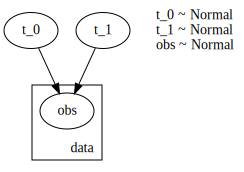

In [265]:
pyro.render_model(model, model_kwargs={"x":x}, render_distributions=True)

In [260]:
model3

<function __main__.model3(x, y=None)>

In [267]:
model(x)

(tensor(-2.0021),
 tensor(-0.8610),
 tensor([ 1.3529,  0.8047,  0.0272,  1.3341,  2.5121,  1.4915,  1.2820,  2.0550,
          0.8693,  1.2952,  1.6736, -0.3503,  2.4621,  1.3744,  2.5595,  2.0659,
          0.3629,  0.0417, -0.7642,  0.3386,  0.1075, -0.2991, -0.6766, -0.4570,
          2.3934, -1.8280, -0.4787,  2.0894, -0.5629, -0.7635, -1.0865, -0.0543,
         -2.7188, -0.6798, -2.1203, -1.1667, -0.8826, -2.1707,  0.9331, -2.4124,
          0.1670,  0.0697, -0.4217, -1.5274, -0.7062, -1.9068, -1.4059, -1.6142,
         -2.0765, -3.0963, -3.4276, -1.9125, -1.6072, -0.9959, -2.5115, -1.4248,
         -2.2709, -1.4453, -4.2233, -2.1666, -3.1950, -2.3235, -4.3770, -2.5803,
         -3.7649, -4.2394, -3.4795, -2.4168, -4.5679, -2.5162, -4.2000, -5.9908,
         -3.2686, -4.8324, -2.4674, -3.8872, -3.2753, -2.7387, -5.8951, -4.0200,
         -6.7356, -4.1014, -3.6177, -6.6708, -6.0111, -6.8212, -6.5641, -4.0858,
         -6.3699, -4.5828, -6.4246, -7.6888, -7.3047, -4.0519, -4.1001, -

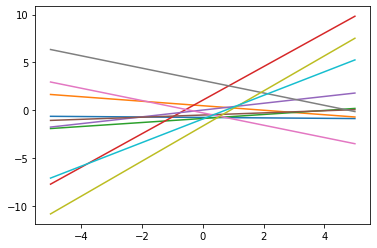

In [278]:
import matplotlib.pyplot as plt
t0s = []
t1s = []
ys = []
for i in range(10):
    t0,t1, y = model(x)
    t0s.append(t0.item())
    t1s.append(t1.item())
    ys.append(y)
    plt.plot(x, x*t1+t0)

In [273]:
ys

[tensor([ 1.4575,  2.9847,  1.1556,  2.3270,  1.2233,  2.8894,  2.2864,  2.6728,
          4.3414,  1.3620,  1.9575,  2.0276,  1.2763,  1.1949,  0.6341,  0.8807,
          1.5906,  2.3009,  1.6627,  1.1779,  2.0335,  1.4718,  2.5949,  1.9055,
          1.3750,  2.4469,  2.8380,  3.6902,  1.7508,  1.7564,  3.0691,  2.0818,
          2.0711,  1.7094,  3.0788,  0.9830,  1.3252, -0.7633,  1.7973,  3.0010,
          0.5178,  0.1199,  2.3803,  2.1244,  2.1722,  4.6328,  3.3811,  1.1285,
          1.2210, -0.6730,  1.6337,  2.1913,  3.0228,  3.8218,  2.1208,  1.4166,
          1.7001,  3.3747,  2.0287,  1.9988,  0.8512,  1.4625,  2.7608,  3.3306,
          1.2818,  3.0363,  0.7014,  1.3127,  2.0164,  0.8339,  1.3020,  4.1316,
          1.8742,  2.4628,  5.3882,  1.8945,  1.1949,  1.4067,  2.2513,  1.7092,
          0.2540,  2.9950,  1.0847,  2.5815,  2.6489,  3.1420,  2.3299,  3.1032,
          2.5005,  0.4573,  2.2553,  2.1000,  2.4631,  3.1343,  1.3788,  1.6561,
          2.9799,  2.0450,  

In [251]:
s.keys()

dict_keys([])